In [1]:
import pandas
import random
import numpy
from matplotlib import pyplot
from astropy import units
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord

In [2]:
%matplotlib inline

In [3]:
spectra = pandas.read_csv('../data/candidates-by-hand.csv', header=None, names=['path'])

In [4]:
def fits_metadata(path):
    with fits.open(path) as hdulist:
        header = hdulist[0].header
        ra = header['RA']
        dec = header['DEC']
        desig = header['DESIG'].split()[-1]
        c = SkyCoord(ra=ra * units.degree, dec=dec * units.degree, frame='icrs')
    return {'id': path.split('/')[-1][:-5], 'desig': desig, 'ra': ra, 'dec': dec,
            'hmsdms': c.to_string('hmsdms'), 'mag3': header['MAG3']}

path = spectra.loc[0, 'path']
fits_metadata(path)

{'dec': 28.992944,
 'desig': 'J053031.56+285934.5',
 'hmsdms': '05h30m31.5641s +28d59m34.5984s',
 'id': 'spec-55951-GAC_080N28_M1_sp13-099',
 'mag3': 16.25,
 'ra': 82.631517}

In [5]:
metadata = spectra['path'].apply(fits_metadata).apply(pandas.Series)

In [6]:
spectra_df = pandas.merge(spectra, metadata, left_index=True, right_index=True)
spectra_df.set_index('id', inplace=True)
spectra_df.sort_values('mag3', inplace=True)

In [7]:
observation = spectra_df[spectra_df['mag3'] < 12]
observation.to_csv('../data/observation.csv')
observation

,path,dec,desig,hmsdms,mag3,ra
id,,,,,,
spec-55916-F5591604_sp06-037,/lamost/F5591604/spec-55916-F5591604_sp06-037....,19.621901,J081511.43+193718.8,08h15m11.4315s +19d37m18.8454s,9.59,123.797631
spec-55967-GAC_073N44_V4_sp03-157,/lamost/GAC_073N44_V4/spec-55967-GAC_073N44_V4...,44.233563,J044943.86+441400.8,04h49m43.8631s +44d14m00.8268s,9.68,72.432763
spec-55984-GAC_099N04_V2_sp01-195,/lamost/GAC_099N04_V2/spec-55984-GAC_099N04_V2...,2.608733,J064114.17+023631.4,06h41m14.1792s +02d36m31.4388s,10.18,100.309080
spec-56350-GAC089N28V2_sp06-062,/lamost/GAC089N28V2/spec-56350-GAC089N28V2_sp0...,28.763902,J060545.79+284550.0,06h05m45.7932s +28d45m50.0472s,10.35,91.440805
spec-56343-GAC075N39V2_sp15-173,/lamost/GAC075N39V2/spec-56343-GAC075N39V2_sp1...,40.996319,J045617.15+405946.7,04h56m17.1526s +40d59m46.7484s,10.38,74.071469
spec-55961-GAC_100N13_V1_sp06-088,/lamost/GAC_100N13_V1/spec-55961-GAC_100N13_V1...,12.897554,J065136.11+125351.1,06h51m36.1104s +12d53m51.1944s,10.45,102.900460
spec-55966-GAC_104N11_V4_sp14-083,/lamost/GAC_104N11_V4/spec-55966-GAC_104N11_V4...,12.897554,J065136.11+125351.1,06h51m36.1104s +12d53m51.1944s,10.45,102.900460
spec-56292-GAC089N16V1_sp12-168,/lamost/GAC089N16V1/spec-56292-GAC089N16V1_sp1...,17.581408,J060406.31+173453.0,06h04m06.3103s +17d34m53.0688s,10.49,91.026293
spec-56343-GAC075N39V1_sp09-155,/lamost/GAC075N39V1/spec-56343-GAC075N39V1_sp0...,40.472112,J050223.41+402819.6,05h02m23.4154s +40d28m19.6032s,10.57,75.597564


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


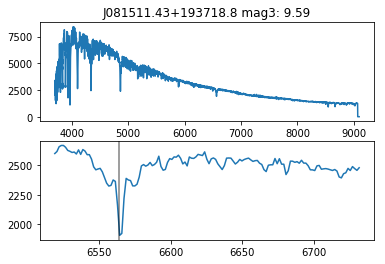

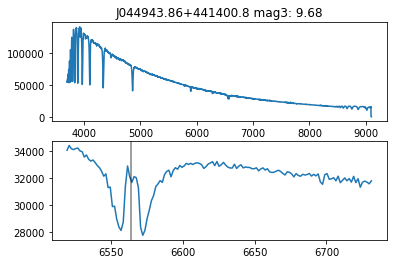

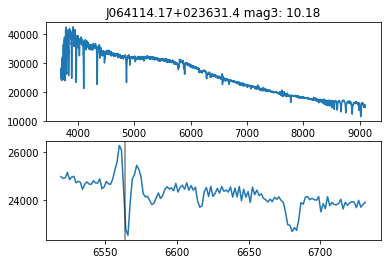

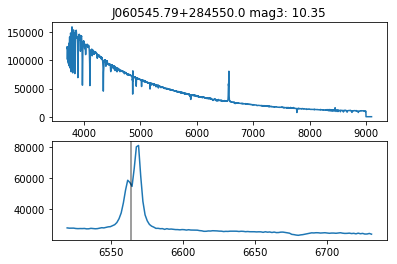

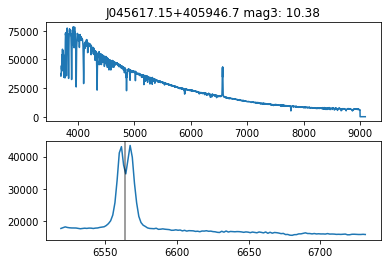

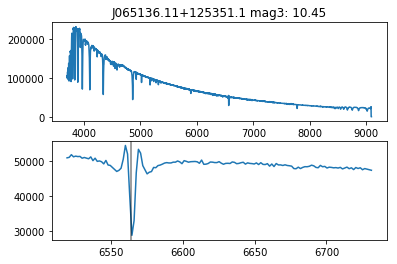

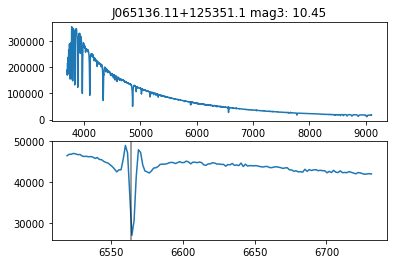

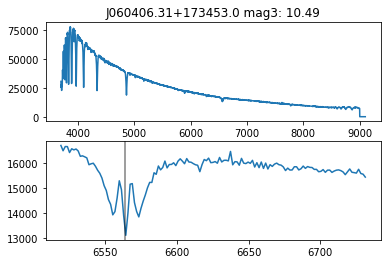

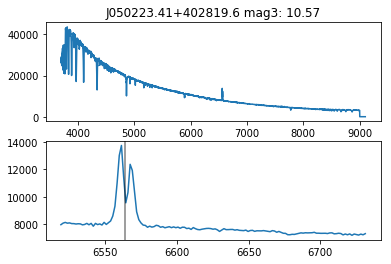

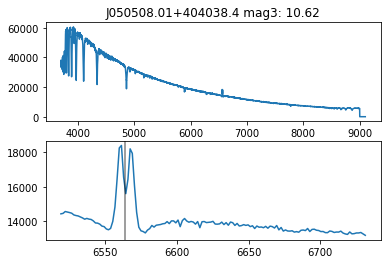

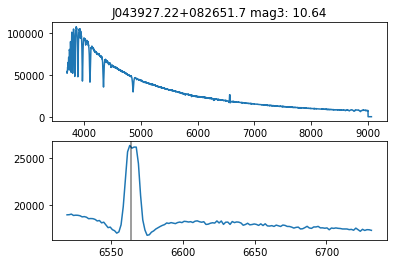

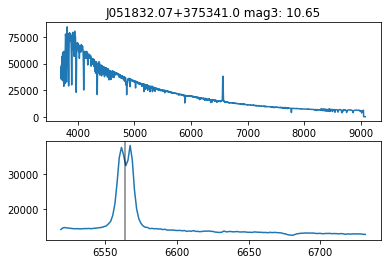

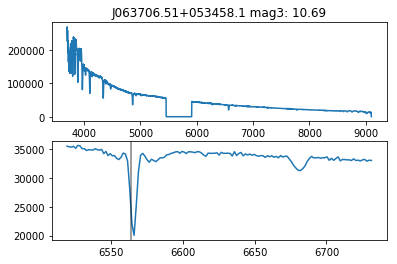

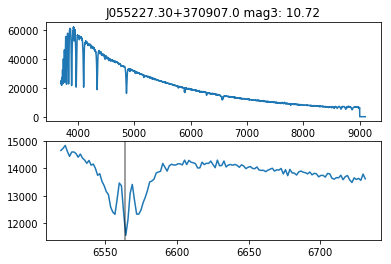

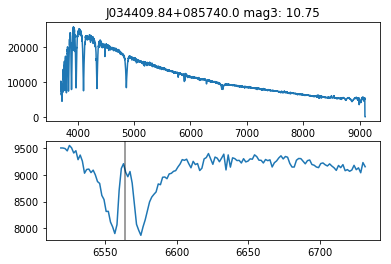

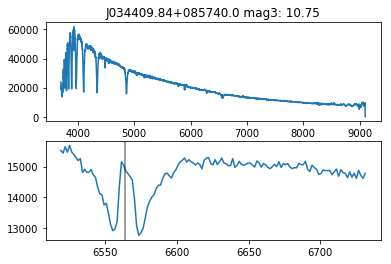

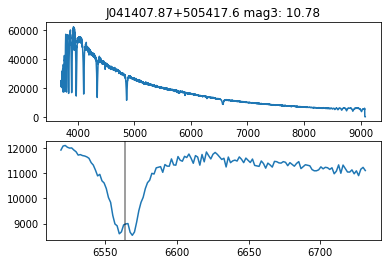

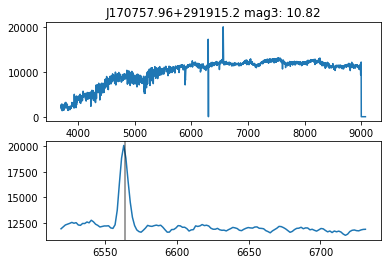

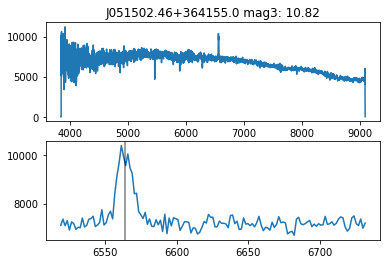

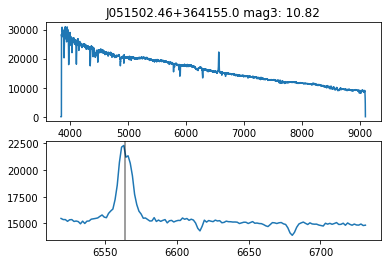

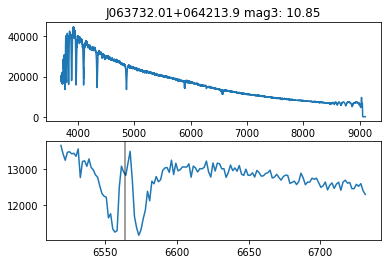

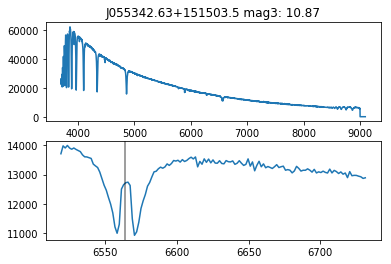

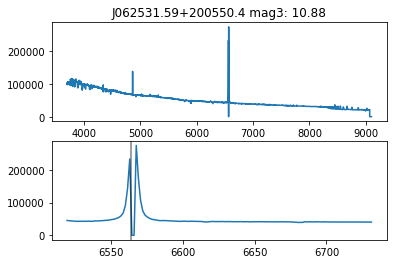

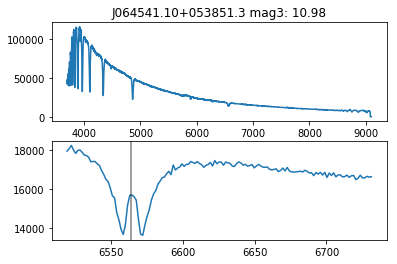

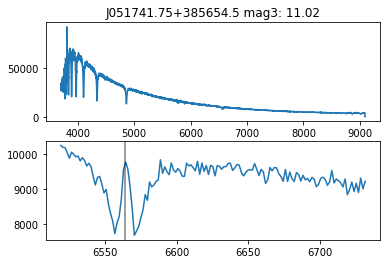

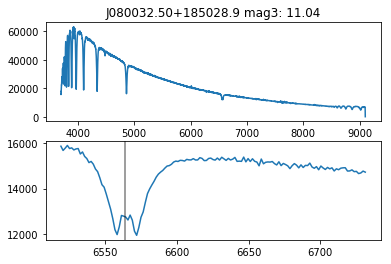

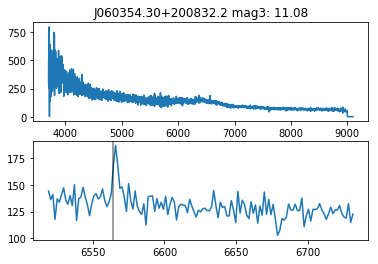

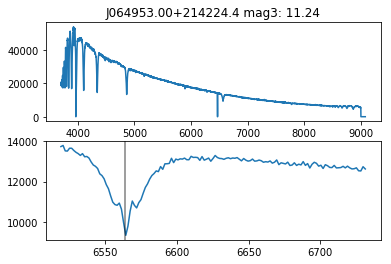

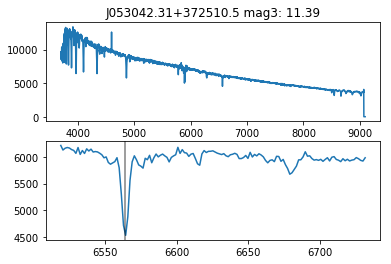

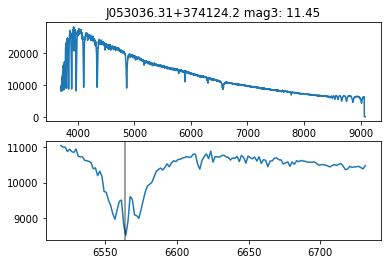

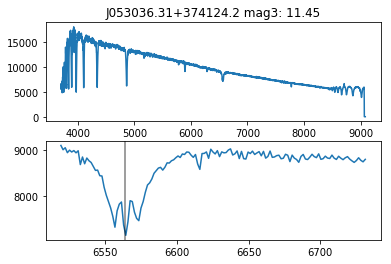

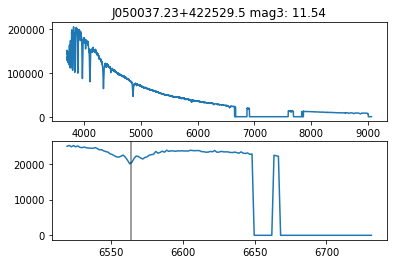

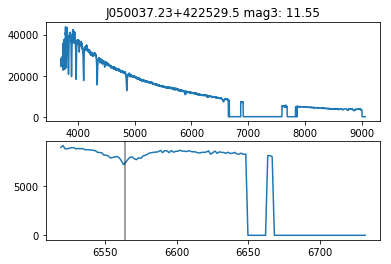

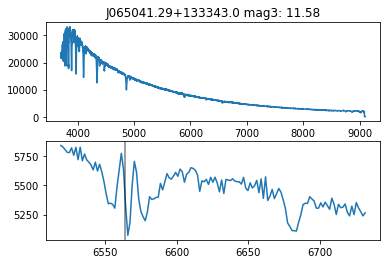

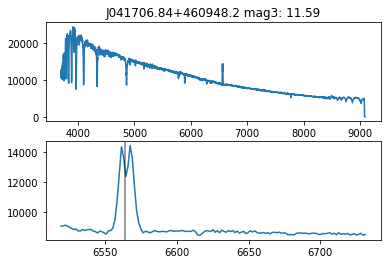

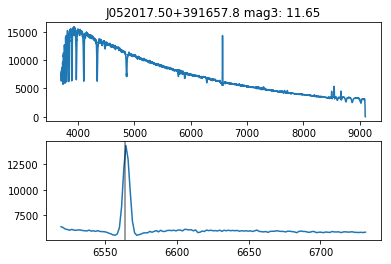

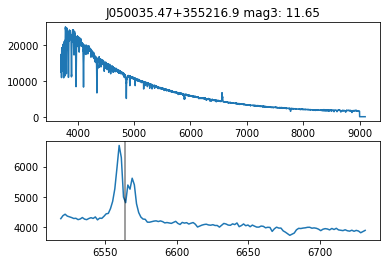

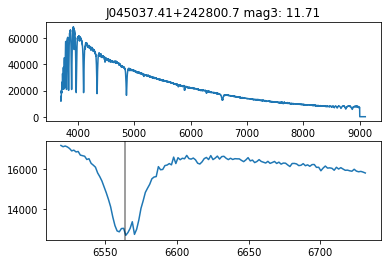

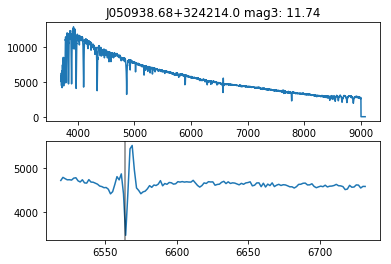

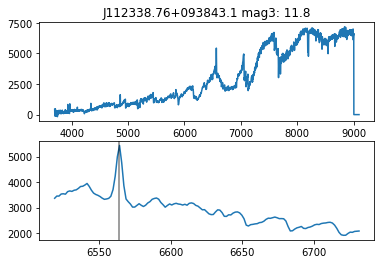

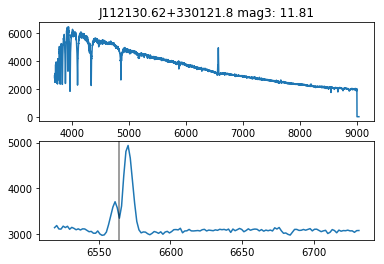

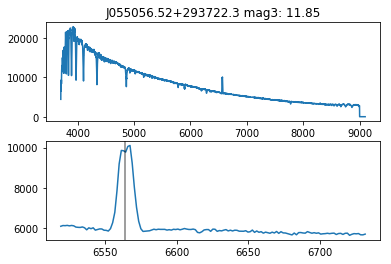

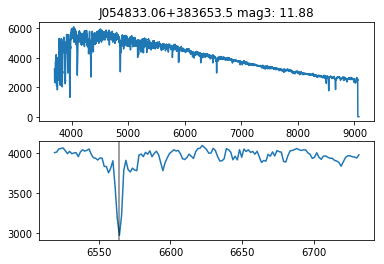

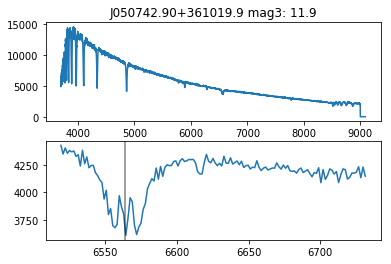

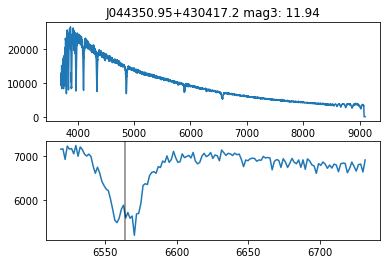

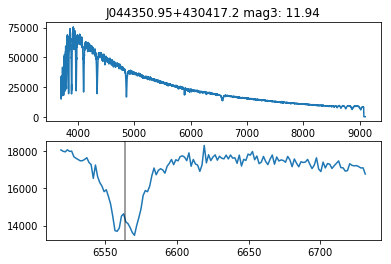

In [8]:
for spectrum in observation.itertuples():
    with fits.open(spectrum.path) as hdulist:
        header = hdulist[0].header
        pixcr = numpy.arange(header['NAXIS1']).reshape(-1, 1)[:, [0, 0]]
        wave = 10 ** wcs.WCS(header).wcs_pix2world(pixcr, 0)[:, 0]
        flux = hdulist[0].data[0]

    fig, (ax1, ax2) = pyplot.subplots(nrows=2)
    ax1.set_title(spectrum.desig + ' mag3: ' + str(spectrum.mag3))
    ax1.plot(wave, flux)
    halpha_idx = (wave >= 6519) & (wave <= 6732)
    ax2.plot(wave[halpha_idx], flux[halpha_idx])
    ax2.axvline(6564, color='black', alpha=0.5)

    pyplot.savefig('../data/img/' + spectrum.Index + '.svg')